In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
#import sys
#!conda install --yes --prefix {sys.prefix} scikit-learn
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
dataset = np.load('proyecto_training_data.npy')
print(dataset)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


In [4]:
x= np.array([[3,-5],[5,1],[6,2],[2,4],[-1,3],[7,8],[9,7],[6,5],[4,1],[4,1]])
x
x = dataset[:10,:10]
numrows = len(x)-round(len(x) * 0.2)
datos_entrenamiento = x[:numrows, ]
datos_entrenamiento = np.array(datos_entrenamiento)
#print(datos_entrenamiento)

In [5]:
mean = np.nanmean(datos_entrenamiento, axis=0)
print(mean)
minimium = np.nanmin(datos_entrenamiento, axis=0)
print(minimium)
maximium = np.nanmax(datos_entrenamiento, axis=0)
print(maximium)
p2p = maximium-minimium
print(p2p)
std = np.nanstd(datos_entrenamiento, axis=0)
print(std)


[2.06687500e+05 6.87500000e+00 1.09262500e+03 6.87500000e+00
 1.98312500e+03 7.38571429e+01]
[1.400e+05 5.000e+00 7.960e+02 5.000e+00 1.915e+03 6.000e+01]
[3.070e+05 8.000e+00 1.694e+03 9.000e+00 2.004e+03 8.500e+01]
[1.67e+05 3.00e+00 8.98e+02 4.00e+00 8.90e+01 2.50e+01]
[5.17288227e+04 9.27024811e-01 2.70275756e+02 1.16592238e+00
 2.81222221e+01 9.03056036e+00]


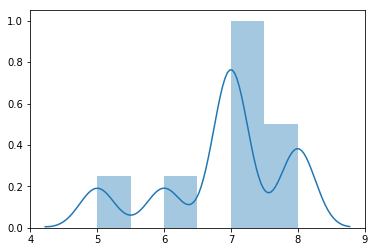

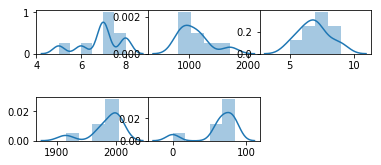

In [6]:
datos_entrenamiento = np.nan_to_num(datos_entrenamiento)
#print(datos_entrenamiento)
#print(datos_entrenamiento[:,1])
ax = sns.distplot(datos_entrenamiento[:,1])
f = plt.figure()
for i in range(5):
    f.add_subplot(3, 3, i+1)
    sns.distplot(datos_entrenamiento[:,i+1])
plt.subplots_adjust(wspace = 0)
plt.subplots_adjust(hspace = 1)
plt.show()

In [7]:
covxy = np.corrcoef(datos_entrenamiento[:,5],datos_entrenamiento[:,0])[0,1]
print(covxy)
covxy = np.corrcoef(datos_entrenamiento,rowvar=0)[0][1:]
covxy

0.09284763574024407


array([0.77206308, 0.73822766, 0.46464276, 0.62922461, 0.09284764])

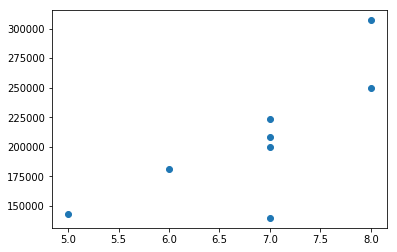

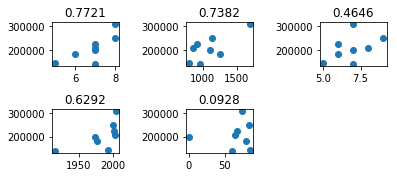

In [8]:
plt.scatter(datos_entrenamiento[:,1],datos_entrenamiento[:,0])
f = plt.figure()
for i in range(5):
    f.add_subplot(3, 3, i+1)
    plt.scatter(datos_entrenamiento[:,i+1],datos_entrenamiento[:,0])
    plt.title(round(covxy[i],4))
plt.subplots_adjust(wspace = 1)
plt.subplots_adjust(hspace = 1)
plt.show()



In [57]:
def mod_regresion_lineal(x,y,epochs,imprimir_error_cada,lr):
    print("hello")
    
mod_regresion_lineal(datos_entrenamiento[:,1],datos_entrenamiento[:,0],10,3,2)

x = datos_entrenamiento[:,4]
y = datos_entrenamiento[:,0]
matX = np.ones((len(x),1), int)
matX = np.column_stack((x,matX))
parametros = [x[0]/y[0],2]
yhat = np.matmul(matX,parametros)
error = np.mean(np.power((y - yhat),2)) / 2
#print(yhat,y,error)
lista_errores = list()
lista_errores.append(error)
subY = np.array(yhat-y)

gradientem = np.mean(subY* matX[:,0])
gradienteb = np.mean(subY*matX[:,1])
subY=subY[:,np.newaxis]
#print(subY,matX)
gradiente = (subY*matX).mean(0)

print(gradientem, gradienteb,gradiente)
    

hello
-410760745.0115018 -206666.44868405274 [-4.10760745e+08 -2.06666449e+05]


In [61]:
x= datos_entrenamiento[:,1]
y= datos_entrenamiento[:,0]
x=x[:,np.newaxis]
reg = LinearRegression().fit(np.array(x), np.array(y))
print(reg.score(x, y))
print(reg.coef_)
print(reg.intercept_) 
reg.predict(x)

0.5960814056276544
[43081.81818182]
-89500.0


array([212072.72727273, 168990.90909091, 212072.72727273, 212072.72727273,
       255154.54545455, 125909.09090909, 255154.54545455, 212072.72727273])